In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [1]:
from google.colab import files
file = files.upload()

Saving Steel_industry_data.csv to Steel_industry_data.csv


In [2]:
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
file_to_load = "Steel_industry_data.csv"

# Read Purchasing File and store into Pandas data frame
steel_csv = pd.read_csv(file_to_load)

steel_csv.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


# Data exploration and cleaning

In [4]:
steel_csv.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [10]:
steel_csv.Load_Type.replace(('Medium_Load', 'Light_Load', 'Maximum_Load'),(1, 0, 2), inplace=True)

In [13]:
# Correlation
steel_csv.iloc[:, 1:7].corr()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000


# PCA

In [17]:
import numpy as np
import pandas as pd
n_components = 2 

X_mean = steel_csv.iloc[:, 1:7] - np.mean(steel_csv.iloc[:, 1:7])
cov_matrix = np.cov(X_mean, rowvar=False)
eigen_values , eigen_vectors = np.linalg.eigh(cov_matrix)

sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_mean.transpose()).transpose()

pca_df = pd.DataFrame(X_reduced, columns = ['PC1', 'PC2'])
pca_df

,PC1,PC2
0,13.559050,-27.010154
1,12.565719,-29.999025
2,13.469269,-28.544645
3,13.376749,-29.679979
4,12.745621,-31.193487
...,...,...
35035,12.666857,-32.571564
35036,12.911763,-28.039992
35037,12.939658,-24.830717
35038,12.963744,-24.221385


[Text(0.5, 1.0, '2D plane')]

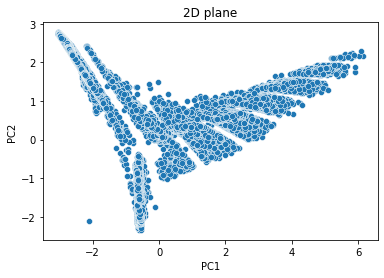

In [18]:
from re import X
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns

df_pca = steel_csv.iloc[:, 1:7]
pca = PCA(n_components=2)
df_pca = preprocessing.scale(df_pca)
pca.fit(df_pca)
pca_df = pca.transform(df_pca)
x = pd.DataFrame(pca_df, columns=['PC1','PC2'])
pca_df

sns.scatterplot(data= x, x = 'PC1', y = 'PC2').set(title='2D plane')

# **Data mining**

In [20]:
df = steel_csv

In [21]:
feature_cols = ['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','Lagging_Current_Power_Factor','Leading_Current_Power_Factor'] 
X = df[feature_cols] # Features
y = df.Load_Type # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [23]:
#Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 2 )

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

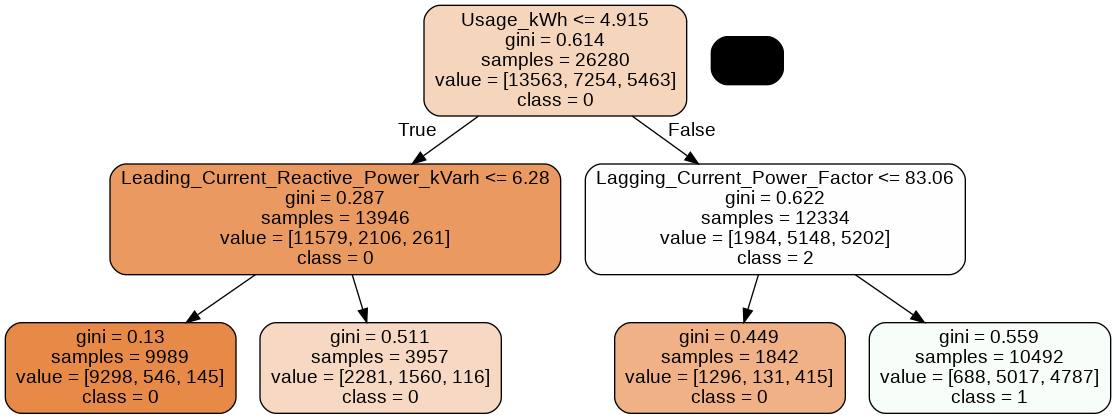

In [24]:
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True, feature_names = feature_cols, class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('test.png')
Image(graph.create_png())

# **Data Evaluation**

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred= clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4509
           1       0.49      0.71      0.58      2442
           2       0.00      0.00      0.00      1809

    accuracy                           0.69      8760
   macro avg       0.44      0.55      0.49      8760
weighted avg       0.56      0.69      0.61      8760



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                      index = ['0','1','2'], 
                     columns = ['Light_Load','Med_Load','Max_Load'])

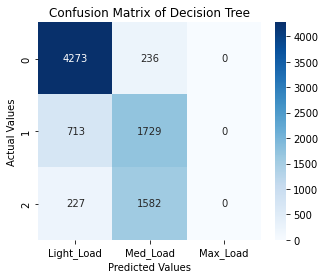

In [32]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='.0f')
plt.title('Confusion Matrix of Decision Tree')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()